**Question 1**

1) Does the waterfront view of a house affect its price? If I bought such a house, how could I influence its price further?

We want to investigate whether a waterfront view does increase the price of a house. As a related question, how else could a client increase the price of their property if they have a house with a waterfront view?

There are a limited amount of ways a client could change their property in order to improve it (for example, an individual has no influence over the size of their neighbours' houses). However, there are several ways a client might be able to improve their property: through renovation; through increasing the size of their property by adding a loft extension; through the introduction of another bathroom; through increasing the condition of their property; and through the grade of their property.

We will examine each of these in turn in order to determine which factors might be worth comparing in our linear regression.

Note: we will be examining factors which seem highly correlated with others individually, since we can check for multicoliearity in our final model if necessary.

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("clean_data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 25 columns):
Unnamed: 0       21596 non-null int64
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
year_sold        21596 non-null int6

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house,renovated
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,1.0
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,0.0
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,0.0
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,0.0


In [4]:
df.duplicated(subset=None, keep='first')

duplicated_rows_df = df[df.duplicated()]

print(duplicated_rows_df)

Empty DataFrame
Columns: [Unnamed: 0, id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, year_sold, age_house, renovated]
Index: []

[0 rows x 25 columns]


This tells us that there are no duplicate rows based on all columns in the dataframe - we don't need to worry about deleting rows which are exact duplicates of each other for all columns.

**Waterfront view**

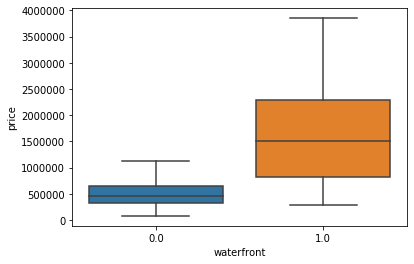

In [5]:
sns.boxplot(x = 'waterfront', y = 'price', data = df, showfliers = False)

The boxplot above shows us that the presence of a waterfront view does significantly increase the price of a house.

In [6]:
df.groupby(['waterfront'])['sqft_living'].mean()

waterfront
0.0    2072.417576
1.0    3244.753425
Name: sqft_living, dtype: float64

This gives us the mean size of houses which have a waterfront and those which don't. It's clear that the houses which do have a waterfront are likely to be much larger than those which don't, which may be contributing to the difference in prices between the two types of houses noted above.

In [7]:
df.groupby(['waterfront'])['grade'].mean()

waterfront
0.0    7.649930
1.0    8.835616
Name: grade, dtype: float64

Again, houses with a waterfront tend to have higher grades than those which don't.

In [8]:
df.groupby(['waterfront'])['sqft_lot'].mean()

waterfront
0.0    15026.516643
1.0    25870.883562
Name: sqft_lot, dtype: float64

Houses with a waterfront tend to have larger lots than houses which do not.

Having a waterfront may be an attractive feature, but there are other factors which will feed into a house's attractiveness which may be causing the big difference in price noted above.

Working only with the houses which have a waterfront view, we want to see which futher factors will influence their price. This would be useful should a client wish to increase the sale price of their house.

In [11]:
df_waterfront_only = df.loc[df['waterfront'] > 0.0]

In [12]:
df_waterfront_only.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house,renovated
49,49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,...,1953,0.0,98070,47.4041,-122.451,2680,72513,2015,62,0.0
230,230,8096000060,4/13/2015,655000.0,2,1.75,1450,15798,2.0,1.0,...,1915,1978.0,98166,47.4497,-122.375,2030,13193,2015,100,1.0
246,246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,...,2000,0.0,98074,47.6338,-122.072,3120,18841,2014,14,0.0
264,264,2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,...,1936,0.0,98070,47.4683,-122.438,1230,14267,2014,78,0.0
300,300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,...,2002,0.0,98074,47.6053,-122.077,4550,19508,2014,12,0.0


In [13]:
df_waterfront_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 49 to 21559
Data columns (total 25 columns):
Unnamed: 0       146 non-null int64
id               146 non-null int64
date             146 non-null object
price            146 non-null float64
bedrooms         146 non-null int64
bathrooms        146 non-null float64
sqft_living      146 non-null int64
sqft_lot         146 non-null int64
floors           146 non-null float64
waterfront       146 non-null float64
view             146 non-null float64
condition        146 non-null int64
grade            146 non-null int64
sqft_above       146 non-null int64
sqft_basement    146 non-null float64
yr_built         146 non-null int64
yr_renovated     146 non-null float64
zipcode          146 non-null int64
lat              146 non-null float64
long             146 non-null float64
sqft_living15    146 non-null int64
sqft_lot15       146 non-null int64
year_sold        146 non-null int64
age_house        146 non-null int64
renovated

**Sqft living**

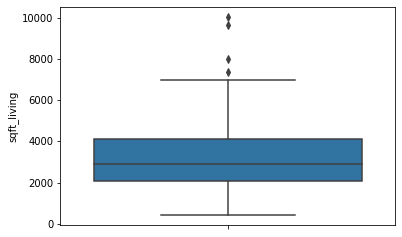

In [14]:
sns.boxplot(y = 'sqft_living', data = df_waterfront_only, showfliers = True)

In [15]:
df_waterfront_only['sqft_living'].mean()

3244.753424657534

We can see from this distribution here that there are some outliers in terms of the sqft living area of the houses in our waterfront dataset. However, we are interested in these luxury houses and wish to leave them in our dataset.

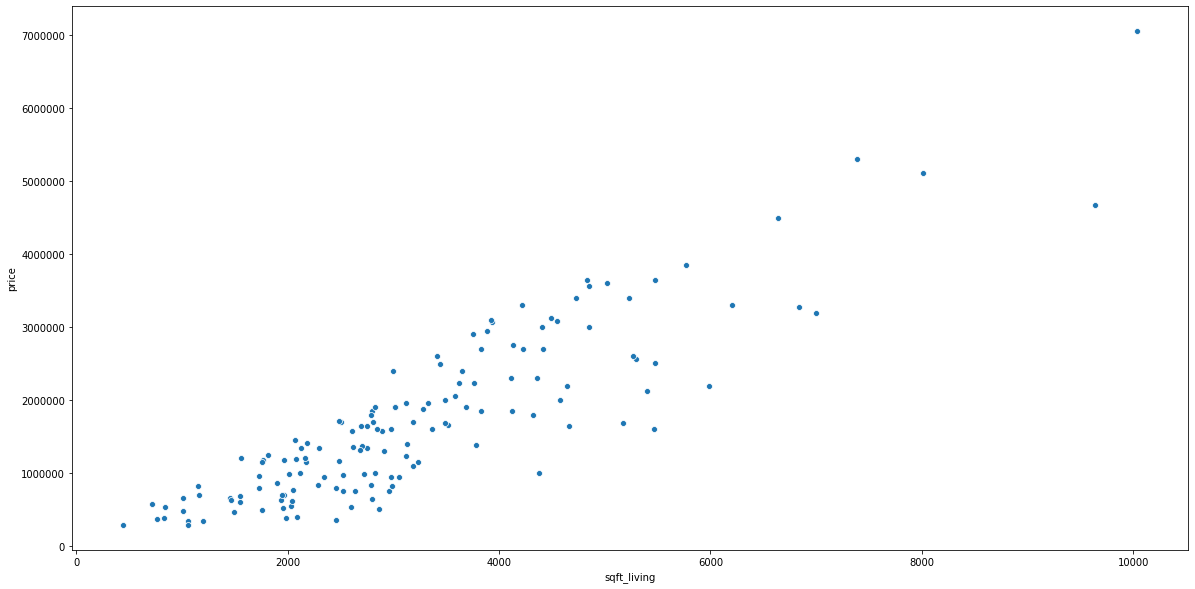

In [16]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price",
                      data=df_waterfront_only)

We can see here that the sqft living area of a home with a waterfront view does increase in line with the price.
Should a client wish to increase the price of their house even further, and if the sqft living area of a house turns out to be a strong predictor for its price, we might be able to advise them to increase the size of their sqft living ara (by adding a loft extension to the house, for example).

**Floors**

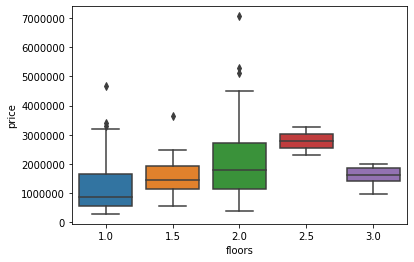

In [17]:
sns.boxplot(x = 'floors', y = 'price', data = df_waterfront_only)

This boxplot suggests that the price of houses with a waterfront view increases as the number of floors increases, until 2.5 floors is reached (this seems to be the cut-off point for the trend). If the number of floors proves to be a strong predictor in our final model, we might suggest a client adds a mezzanine to add value to their property before selling it.

**Renovation**

In [19]:
df_waterfront_only['renovated'].value_counts()

0.0    117
1.0     29
Name: renovated, dtype: int64

We can compare the properties which have been renovated and those which haven't.

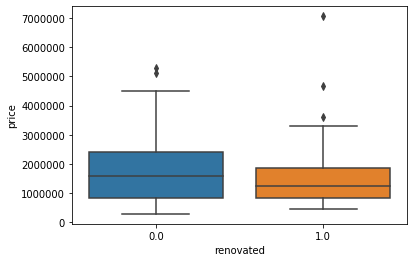

In [20]:
sns.boxplot(x = 'renovated', y = 'price', data = df_waterfront_only)

It looks like renovating a house with a waterfront view does not affect increase the salesprice. However, this effect could be due to the fact that so few houses with a waterfront view have actually been renovated.

**Grade**

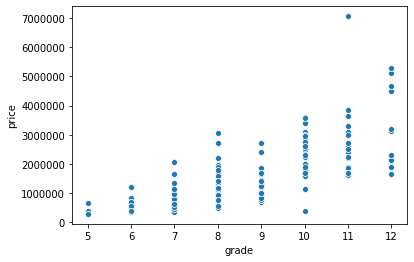

In [21]:
ax = sns.scatterplot(x="grade", y="price",
                      data=df_waterfront_only)

It seems that the higher the grade of a house with a waterfront view, the higher its price. If this is found to be a strong predictor in our final model, we might suggest to clients that they try and improve the grade of their house according to the King County grading system.

**Bathrooms**

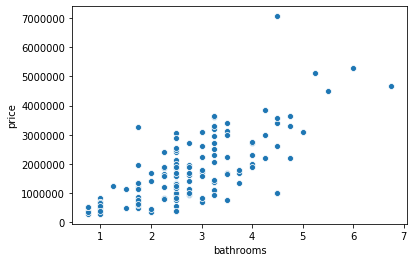

In [22]:
ax = sns.scatterplot(x="bathrooms", y="price",
                      data=df_waterfront_only)

It seems that the higher the number of bathrooms in a house with a waterfront view, the higher its price. If this is found to be a strong predictor in our final model, we might suggest to clients that they try and install additional bathrooms or bathroom units (single toilets with a sink, for example) in their house.

If we plot the different factors above against each other above, this will give us more of a feel for the relationship they have and will guide our linear regression.

Price vs sqft living vs floors

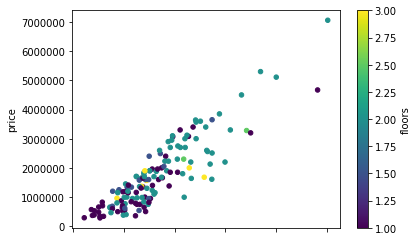

In [23]:
ax2 = df_waterfront_only.plot.scatter(x='sqft_living',
                       y='price',
                      c='floors',
                      colormap='viridis')

This tells us that if a house has a high sqft living area and more floors, the higher its price. However, it seems that not many houses have more than three floors after a certain sqft living space is reached.This may be useful for us when advising future clients about changes that they can make to their properties.

Price vs sqft living vs renovation

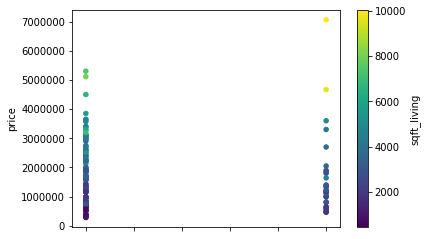

In [26]:
ax2 = df_waterfront_only.plot.scatter(x='renovated',
                       y='price',
                      c='sqft_living',
                      colormap='viridis')

This shows us that the properties which have been renovated might have higher sqft, but they are fewer in number. Additionally, those houses which have been renovated tend to be at either end of the price and size spectrums.

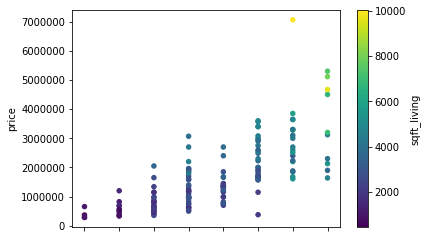

In [27]:
ax2 = df_waterfront_only.plot.scatter(x='grade',
                       y='price',
                      c='sqft_living',
                      colormap='viridis')

The trend here is clear: the more bathrooms a house has, the larger its area is and the higher its price will be.

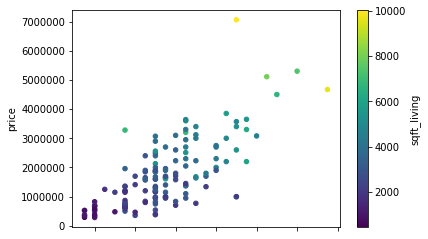

In [28]:
ax2 = df_waterfront_only.plot.scatter(x='bathrooms',
                       y='price',
                      c='sqft_living',
                      colormap='viridis')

We have considered the factors which a client might be able to influence themselves when selling the price. However, we must be wary of multicolinearity. As we saw in the pairwise correlation in our introduction document, the sqft living area of a house is highly correlated with its grade and the number of bathrooms it has. When we carry out the regression, we will have to be wary of this and may not be able to use them alongside each other.

From our pairwise correlation in the introduction document, the correlation between a house's sqft living space and the number of floors is not particularly strong (0.35). We do not need to worry about multicolinearity here. The sqft living area and number of floors can be considered as separate factors.

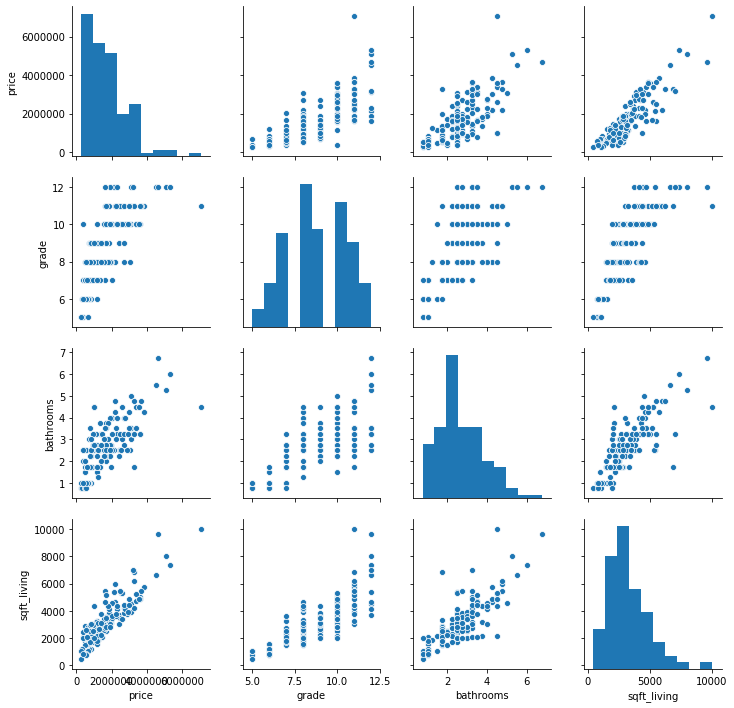

In [29]:
sns.pairplot(df_waterfront_only[['price','grade', 'bathrooms', 'sqft_living']])

This gives us a good indication of the factors which correlate highly with price: bathrooms, grade, and sqft living. We should consider these in our final model.